In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf

In [37]:
def pca_mnist(n_components=30):
    # Load the MNIST dataset
    (x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

    # Combine the training and testing data
    X = np.concatenate((x_train, x_test), axis=0)

    # Flatten the images into vectors
    X = X.reshape(X.shape[0], -1)

    # Convert data to float and scale it between 0 and 1
    X = X.astype(float) / 255.0

    # Calculate the mean vector
    mean_vector = np.mean(X, axis=0)

    # Subtract the mean vector from the data
    X_centered = X - mean_vector

    # calculating the covariance matrix of the mean-centered data.
    cov_mat = np.cov(X_centered , rowvar = False)

    #Calculating Eigenvalues and Eigenvectors of the covariance matrix
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    #sort the eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    
    sorted_eigenvalue = eigen_values[sorted_index]
    #similarly sort the eigenvectors 
    sorted_eigenvectors = eigen_vectors[:,sorted_index]


    # select the first n eigenvectors, n is desired dimension
    # of our final reduced data.
    eigenvector_subset = sorted_eigenvectors[:,0:n_components]

    #Transform the data 
    X_reduced = np.dot(eigenvector_subset.transpose(),X_centered.transpose()).transpose()

    # Reconstruct the data from the projected space
    X_reconstructed = np.dot(X_reduced, eigenvector_subset.T) + mean_vector

    return X_reconstructed



In [38]:
n_components = 1000

In [39]:
X_reconstructed = pca_mnist(n_components=n_components)

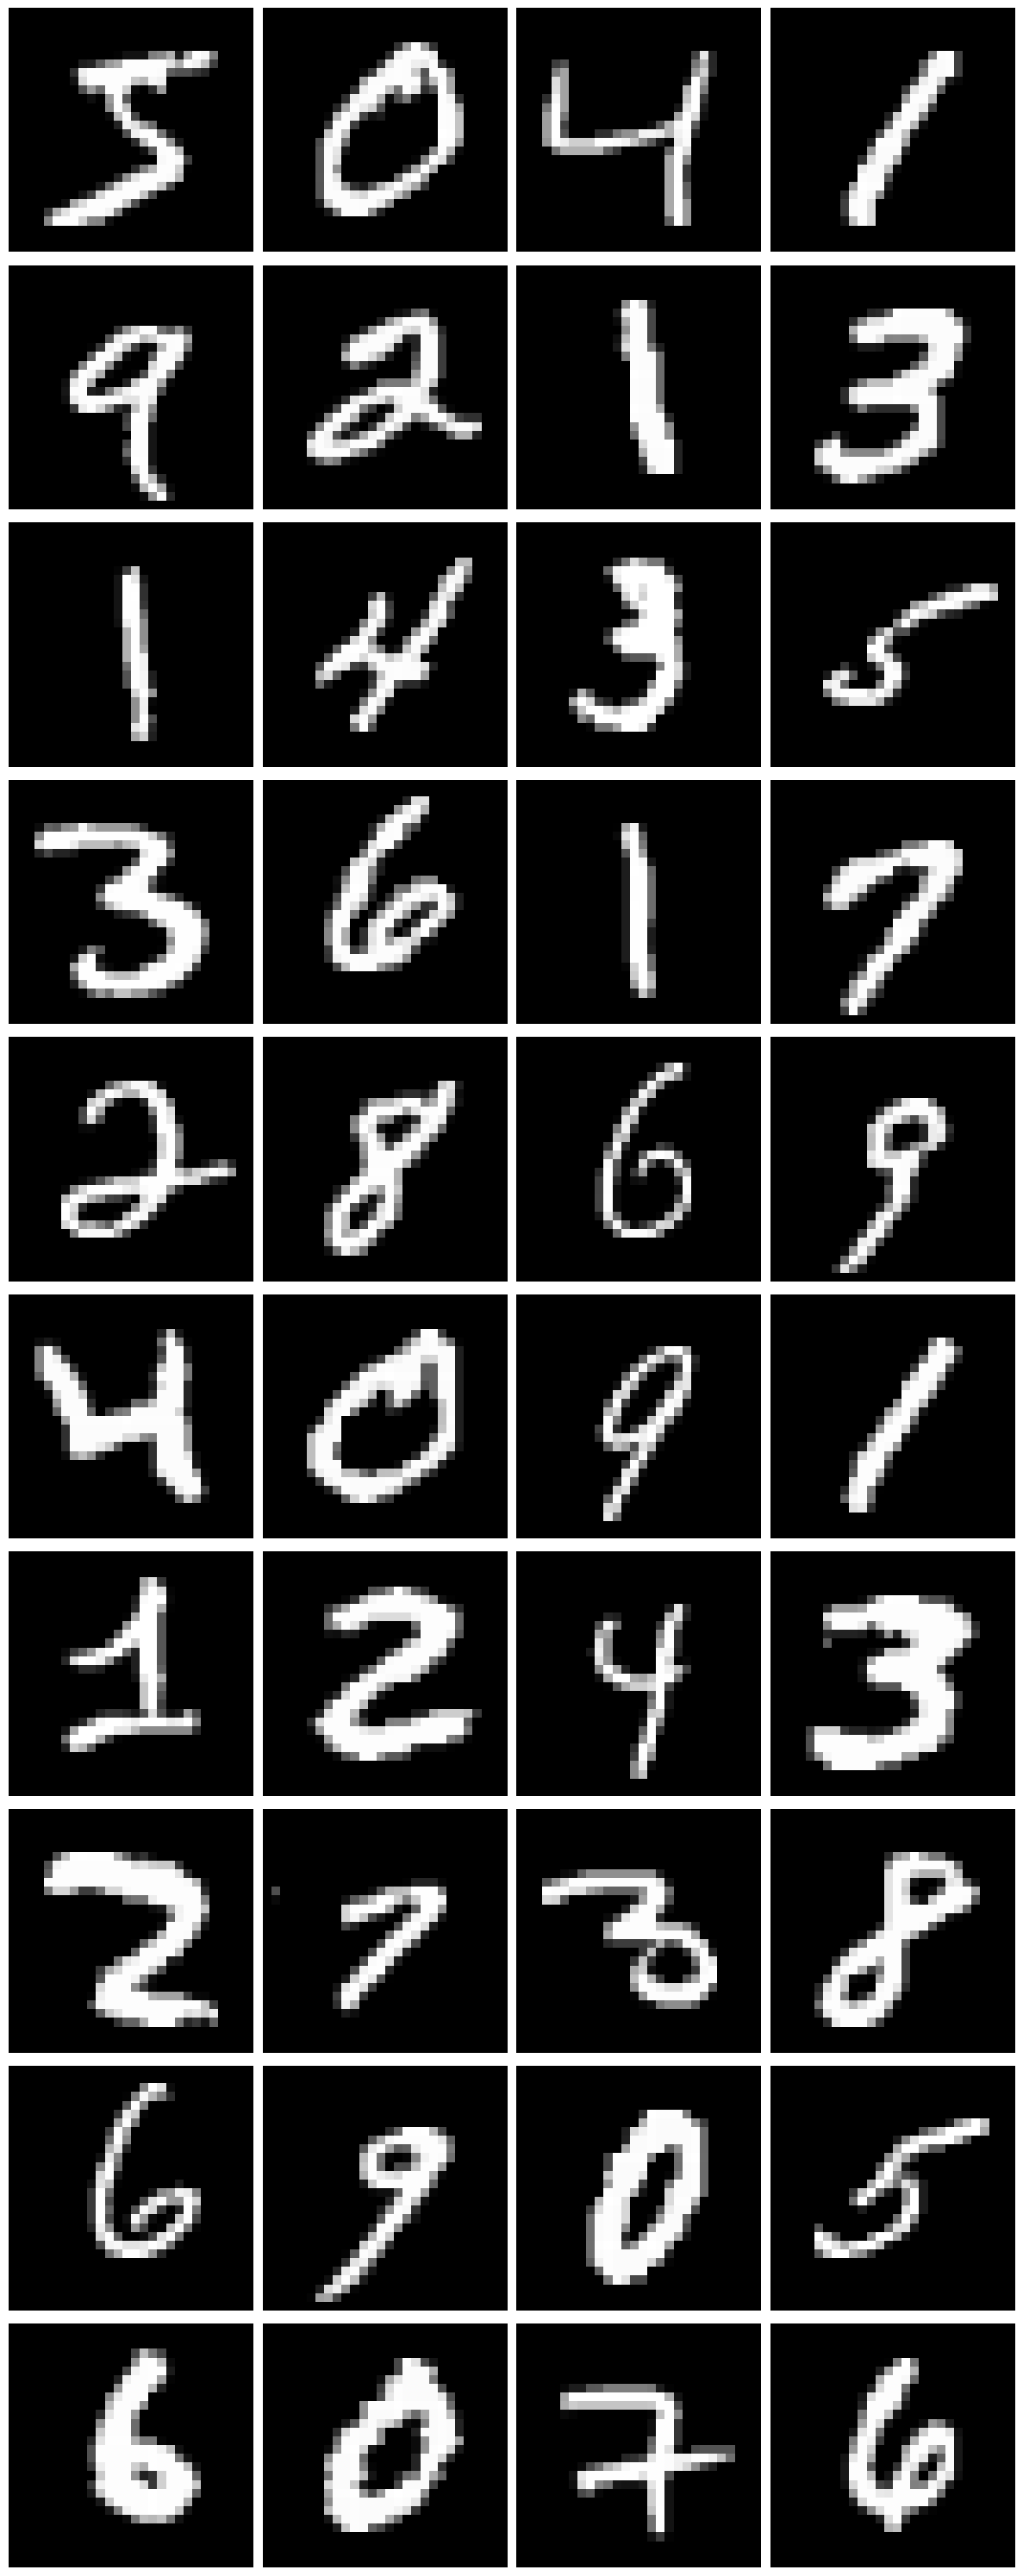

In [43]:
# Display the generated images in a grid
num_images = 40
num_rows = num_images // 4

fig, axes = plt.subplots(num_rows, 4, figsize=(12, 3*num_rows))
axes = axes.flatten()

for i in range(num_images):
    axes[i].imshow(X_reconstructed[i], cmap='gray')
    axes[i].axis('off')

plt.tight_layout()
plt.show()